In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import regex as re
import pickle

In [3]:
df = pd.read_csv('kickstarter_data_2024.csv')

C:\Users\Philip Nancollas\AppData\Local\Temp\ipykernel_16208\3548793931.py:1: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('kickstarter_data_2024.csv')


In [2]:
df.head()

NameError: name 'df' is not defined

In [62]:
df['creator'].value_counts()



creator
{"id":2053011023,"name":"Benjamin Hennessey","slug":"combatmedallions","is_registered":null,"is_email_verified":null,"chosen_currency":null,"is_superbacker":null,"avatar":{"thumb":"https://i.kickstarter.com/assets/008/647/822/59acad1fb0a00a22cd0c5df2db43343f_original.jpg?anim=false&fit=cover&height=40&origin=ugc&q=92&width=40&sig=uVHqGd5n7mtvMVWCKw3g1VKHY9f9G%2BR%2BnAfAvfHiN2E%3D","small":"https://i.kickstarter.com/assets/008/647/822/59acad1fb0a00a22cd0c5df2db43343f_original.jpg?anim=false&fit=cover&height=80&origin=ugc&q=92&width=80&sig=5UylI46e9CJ4wepmibl%2FuvJyuiO5RNaPxGaXMvX1e4Q%3D","medium":"https://i.kickstarter.com/assets/008/647/822/59acad1fb0a00a22cd0c5df2db43343f_original.jpg?anim=false&fit=cover&height=160&origin=ugc&q=92&width=160&sig=fcOVlSf12hnAzkmjqStyARCSWl2x5jybjN4NSBgtZNY%3D"},"urls":{"web":{"user":"https://www.kickstarter.com/profile/combatmedallions"},"api":{"user":"https://api.kickstarter.com/v1/users/2053011023?signature=1720757855.f22751a48fb22a4ebf3a18fd

In [76]:
import simplejson
j = simplejson.loads(df['creator'][0])
j["id"]

1796521275

In [ ]:
blah = df["1265966003" in str(df['creator']["id"])]
blah

KeyError: True

In [4]:
blurb_data = df[['blurb', 'state']]


In [5]:
blurb_data = blurb_data[blurb_data['state'] != "live"]
blurb_data = blurb_data[blurb_data['state'] != "submitted"]
blurb_data = blurb_data[blurb_data['state'] != "canceled"]
blurb_data = blurb_data[blurb_data['state'] != "started"]
blurb_data = blurb_data[blurb_data['state'] != "suspended"]
blurb_data.head()
# blurb_data.reset_index()

,blurb,state
9,"Small knife. Big tasks. No-frills, purpose dri...",successful
10,A beautifully designed stainless steel mirror ...,successful
11,A discreet beverage dispensing and storage sol...,successful
12,Kickstarter exclusive dark mode hardcover & sp...,successful
13,Help us fund the upcoming audiobook by securin...,successful


In [6]:
blurb_data['state'].value_counts()

state
successful    1259312
failed         708511
Name: count, dtype: int64

In [6]:
blurb_data["state"] = blurb_data["state"].apply(lambda x: 1 if x == "successful" else 0).astype(int)
blurb_data['state'].value_counts()

state
1    1259312
0     708511
Name: count, dtype: int64

In [7]:
blurb_data = blurb_data.drop_duplicates()
blurb_data = blurb_data.reset_index(inplace = False, drop = True)
blurb_data.shape

(207225, 2)

In [8]:
blurb_data[blurb_data.select_dtypes(['object']).columns] = blurb_data.select_dtypes(['object']).astype(str)

In [9]:
def preprocess_text(text):
    # Remove any character that is not a letter (a-z) or white space ( )
    text = re.sub(r'[^a-zA-Z]', " ", text)
    
    # Remove white spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)

    # Multiple white spaces into one
    text = re.sub(r'\s+', " ", text.lower())

    # Remove tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

    return text.split()

blurb_data["blurb"] = blurb_data["blurb"].apply(preprocess_text)
blurb_data.head()

,blurb,state
0,"[small, knife, big, tasks, no, frills, purpose...",1
1,"[a, beautifully, designed, stainless, steel, m...",1
2,"[a, discreet, beverage, dispensing, and, stora...",1
3,"[kickstarter, exclusive, dark, mode, hardcover...",1
4,"[help, us, fund, the, upcoming, audiobook, by,...",1


In [10]:
download("wordnet")
lemmatizer = WordNetLemmatizer()

download("stopwords")
stop_words = stopwords.words("english")

# remove_words = ['designed']

stop_words.append('designed')
stop_words.append('kickstarter')
stop_words.append('name')

[nltk_data] Downloading package wordnet to C:\Users\Philip
[nltk_data]     Nancollas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Philip
[nltk_data]     Nancollas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def lemmatize_text(words, lemmatizer = lemmatizer):
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 3]
    return tokens

blurb_data["blurb"] = blurb_data["blurb"].apply(lemmatize_text)
blurb_data.head()


,blurb,state
0,"[small, knife, task, frill, purpose, driven, d...",1
1,"[beautifully, stainless, steel, mirror, paired...",1
2,"[discreet, beverage, dispensing, storage, solu...",1
3,"[exclusive, dark, mode, hardcover, spicy, rewa...",1
4,"[help, fund, upcoming, audiobook, securing, co...",1


In [12]:
success_set = blurb_data[blurb_data['state'] == 1]
failed_set = blurb_data[blurb_data['state'] == 0]
success_set

,blurb,state
0,"[small, knife, task, frill, purpose, driven, d...",1
1,"[beautifully, stainless, steel, mirror, paired...",1
2,"[discreet, beverage, dispensing, storage, solu...",1
3,"[exclusive, dark, mode, hardcover, spicy, rewa...",1
4,"[help, fund, upcoming, audiobook, securing, co...",1
...,...,...
207220,"[game, tile, placement, transportation, networ...",1
207221,"[small, black, core, watanabe, matte, purple, ...",1
207222,"[printable, tank, inspired, design, world, sup...",1
207223,"[printable, terrain, scenery, multi, level, sk...",1


In [ ]:
# set_a = success_set['blurb'][0]
# set_a = set(set_a)
# set_a

# set_b = success_set['blurb'][1]
# set_b = set(set_b)
# set_b

# set_a.difference(set_b)

{'design', 'driven', 'free', 'frill', 'knife', 'purpose', 'small', 'task'}

In [13]:
success_words = []
for words in success_set['blurb']:
    for word in words:
        success_words.append(word)

len(success_words)

1240193

In [14]:
fail_words = []
for words in failed_set['blurb']:
    for word in words:
        fail_words.append(word)

len(fail_words)

787669

In [ ]:
# success_words = ["apple", "apple", "snake", "red", "boudoir"]
# fail_words = ["apple", "opulent", "masquerade", "red"]

In [15]:
success_lim = len(success_words)
fail_lim = len(fail_words)
i = 0
j = 0

while i < success_lim:
    j = 0
    while j < fail_lim:
        if success_words[i] == fail_words[j]:
            del(success_words[i])
            success_lim = success_lim - 1
            del(fail_words[j])
            fail_lim = fail_lim - 1
        j = j + 1
    i = i + 1

# for i in range(len(success_words)):
#     for j in range(len(fail_words)):
#         if success_words[i] == fail_words[j]:
#             del(success_words[i])
#             i = i -1
#             del(fail_words[j])
#             j = j -1
#             break

In [58]:
fail_words

['opulent', 'masquerade']

In [31]:
success_word_set = set(success_words)
fail_word_set = set(fail_words)

In [58]:
success_words.value_counts()

AttributeError: 'list' object has no attribute 'value_counts'

In [37]:
success_exclusive = success_word_set.difference(fail_word_set)


In [50]:
success_exclusive_set = [item for item in success_words if item in success_exclusive]
# success_exclusive_set

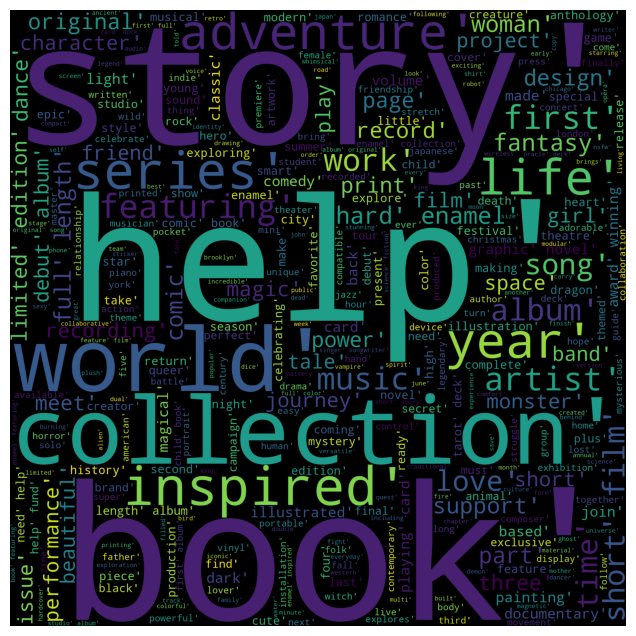

In [16]:
success_wordcloud = WordCloud(width = 2000, height = 2000, background_color = "black", max_words = 10000, min_font_size = 20, random_state = 42)\
    .generate(str(success_words))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(success_wordcloud)
plt.axis("off")
plt.show()

In [51]:
fail_exclusive = fail_word_set.difference(success_word_set)

In [ ]:
fail_exclusive_set = list(fail_exclusive)

In [59]:
failed_set['contains_words'] = failed_set['blurb'].apply(lambda x: any(word in x for word in fail_exclusive_set))

C:\Users\Philip Nancollas\AppData\Local\Temp\ipykernel_11648\313149114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_set['contains_words'] = failed_set['blurb'].apply(lambda x: any(word in x for word in fail_exclusive_set))


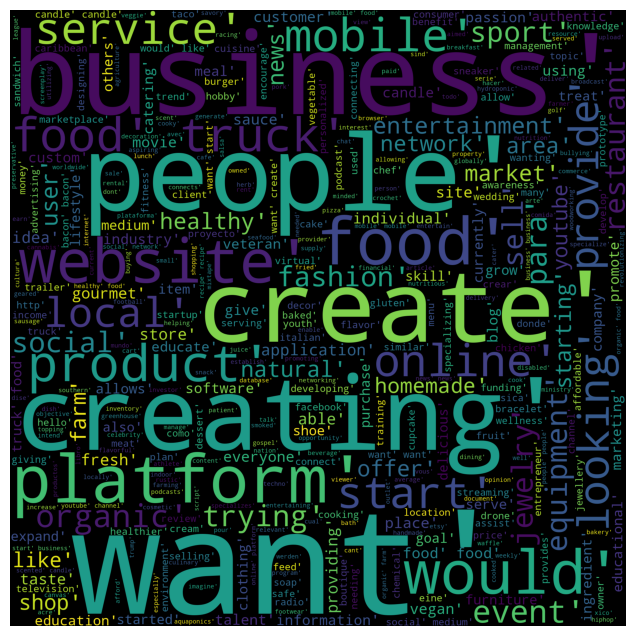

In [17]:
failed_wordcloud = WordCloud(width = 2000, height = 2000, background_color = "black", max_words = 10000, min_font_size = 20, random_state = 42)\
    .generate(str(fail_words))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(failed_wordcloud)
plt.axis("off")
plt.show()

In [20]:
pickle.dump(success_words, open('Success_Words.sav', 'wb'))

In [21]:
pickle.dump(fail_words, open('Fail_Words.sav', 'wb'))